 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [117]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [118]:
# Reading whale returns
whale_returns_df = pd.read_csv('whale_returns.csv')

In [119]:
# Converting index into DateTime index
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)

# Drop extra date column
whale_returns_df.drop(columns=['Date'], inplace=True)

In [120]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [121]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [122]:
# Check df
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [123]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(Path('algo_returns.csv'))

In [124]:
# Converting index into DateTime index
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)

# Drop extra date column
algo_returns_df.drop(columns=['Date'], inplace=True)

In [125]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [126]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [127]:
# Check df
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [128]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(Path('sp_tsx_history.csv'))

In [129]:
# Converting index into DateTime index
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)

# Drop extra date column
sp500_history_df.drop(columns=['Date'], inplace=True)

In [130]:
# Remove '$' symbol
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace(r'$', '', regex=False).str.replace(r',', '', regex=False)

In [131]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [132]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [133]:
# Calculate Daily Returns
sp500_history_df = sp500_history_df.pct_change()

In [134]:
# Drop nulls
sp500_history_df.dropna(inplace=True)

In [135]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df.rename({'Close': 'S&P 500'}, axis=1, inplace=True)

In [136]:
# Check df
sp500_history_df

,S&P 500
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P 500 Returns

In [137]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis='columns', join='inner')

In [138]:
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

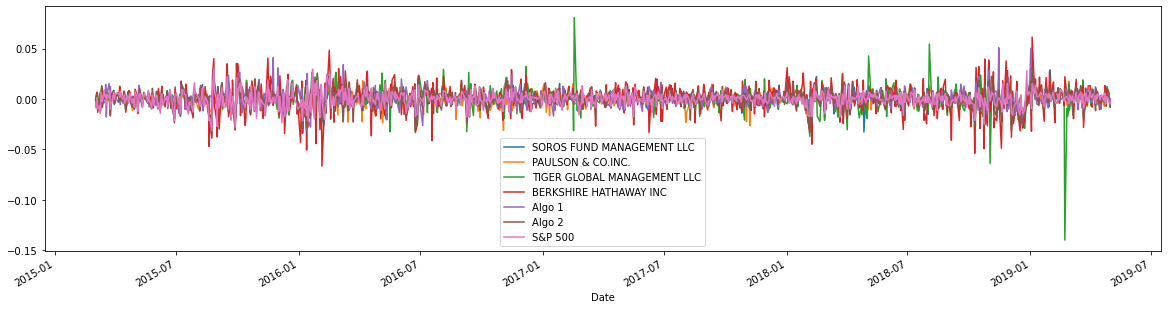

In [139]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

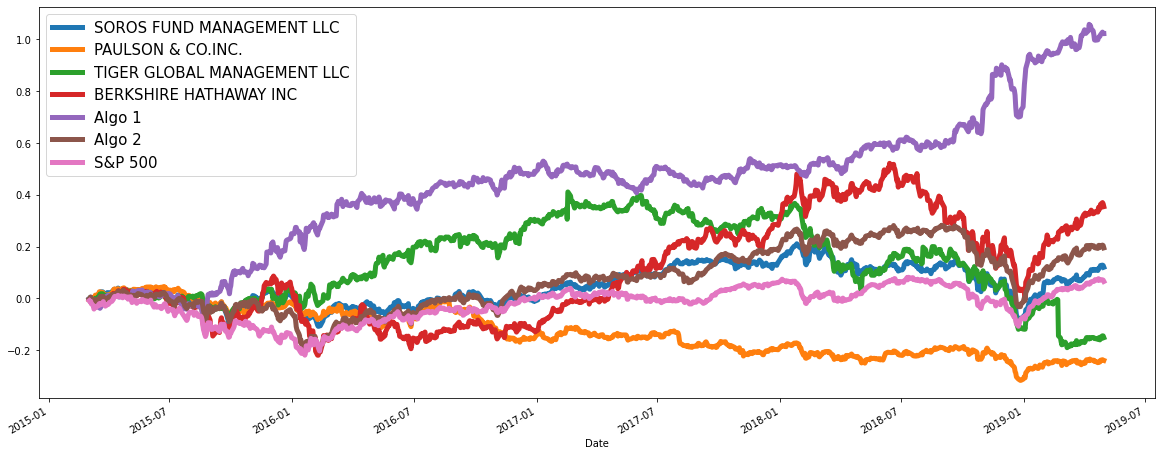

In [140]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,8), linewidth=5).legend(prop={'size' : 15})

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

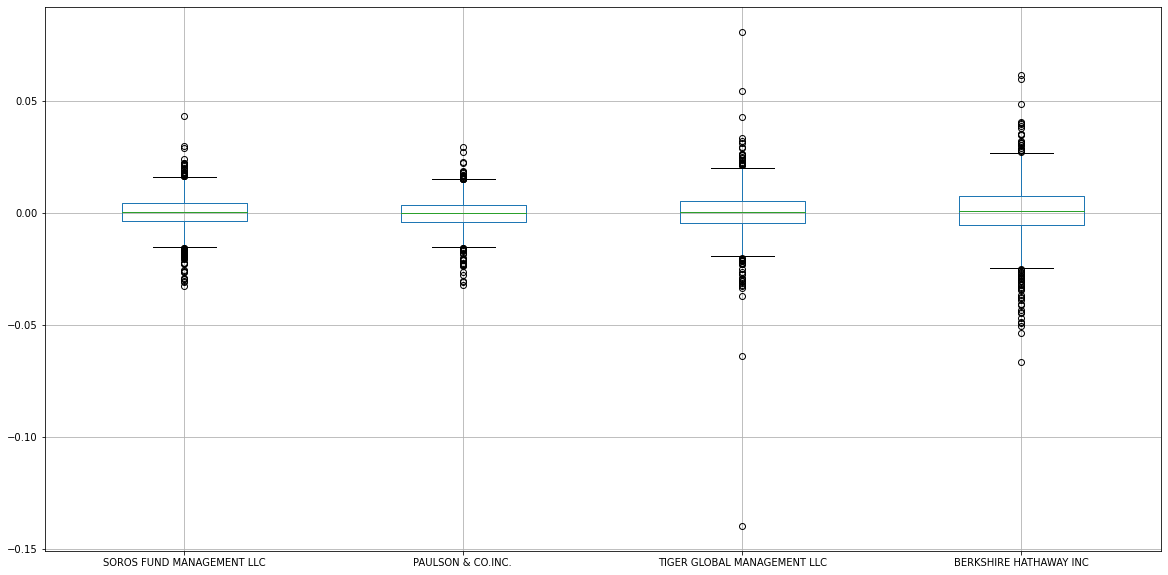

In [141]:
# Box plot to visually show risk
whale_returns_df.boxplot(figsize=(20,10))

<AxesSubplot:>

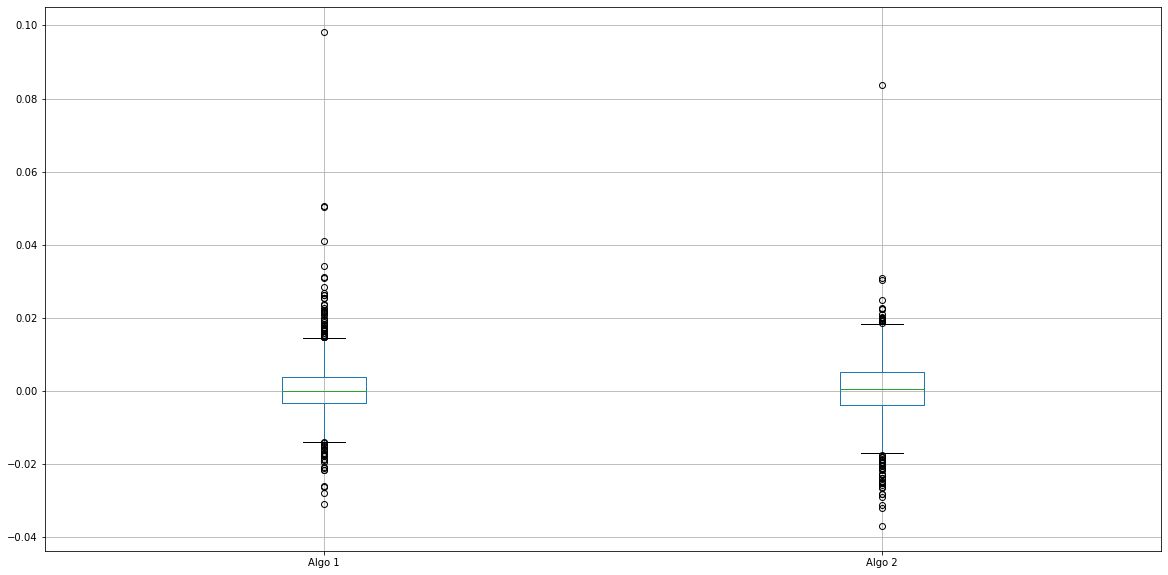

In [142]:
algo_returns_df.boxplot(figsize=(20,10))

<AxesSubplot:>

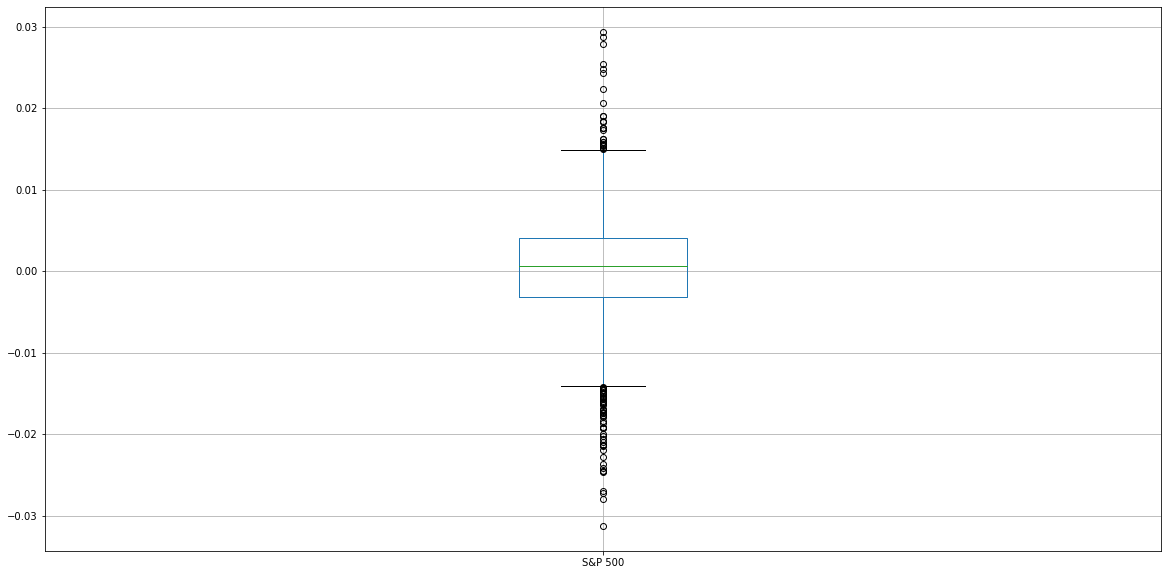

In [143]:
sp500_history_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [144]:
# Calculate the daily standard deviations of all portfolios
combined_df.std().sort_values()

PAULSON & CO.INC.              0.006982
S&P 500                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [145]:
# Determine which portfolios are riskier than the S&P 500
# The portfolios with a higher standard deviation of the S&P 500 (0.00857) are riskier. Therefore, Algo 1, Algo 2, SOROS FUND MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are riskier investments.

### Calculate the Annualized Standard Deviation

In [146]:
# Calculate the annualized standard deviation (252 trading days)
annnual_combined_std = combined_df * np.sqrt(252)
annnual_combined_std.std().sort_values()

PAULSON & CO.INC.              0.110841
S&P 500                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

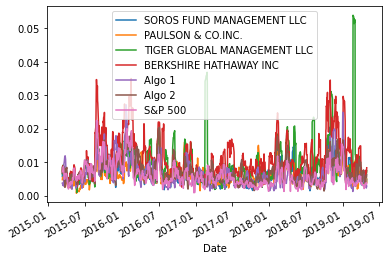

In [147]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
average_21_days = combined_df.rolling(window=7).std()
# Plot the rolling standard deviation
average_21_days.plot()

### Calculate and plot the correlation

In [148]:
# Calculate the correlation
stock_correlation = combined_df.corr()
# Display de correlation matrix
stock_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P 500,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

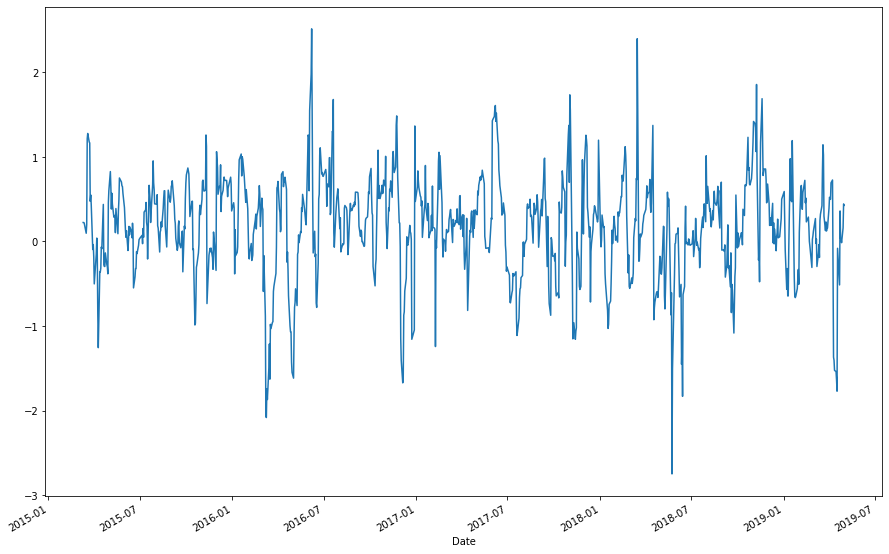

In [149]:
# Calculate covariance of a single portfolio
algo1_covar = combined_df['Algo 1'].rolling(window=7).cov(combined_df['S&P 500'])
# Calculate variance of S&P 500
sp500_var = combined_df['S&P 500'].rolling(window=7).var()
# Computing beta
algo1_beta = algo1_covar / sp500_var
# Plot beta trend
algo1_beta.plot(figsize=(15,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

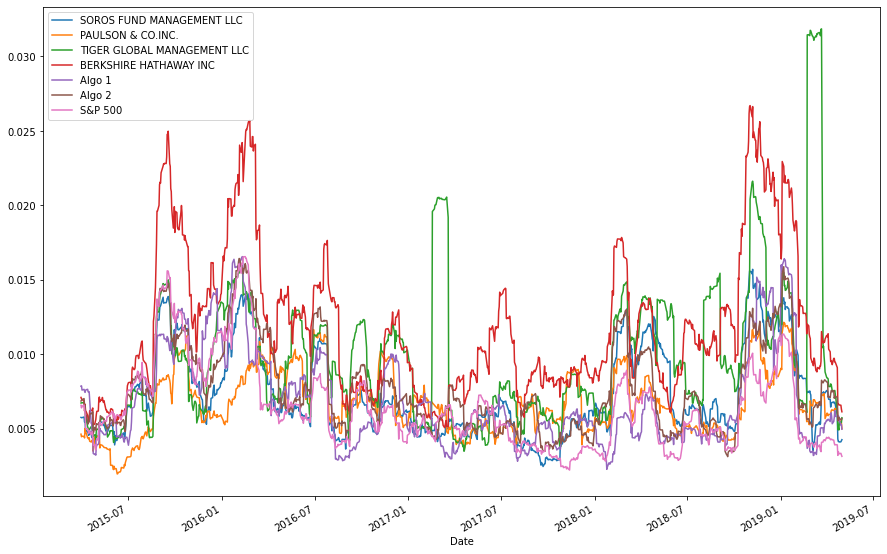

In [150]:
# Use `ewm` to calculate the rolling window
combined_df.rolling(window=21).std().plot(figsize=(15,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [151]:
# Annualized Sharpe Ratios
portfolio_sharpe = combined_df.mean() / combined_df.std()

<BarContainer object of 7 artists>

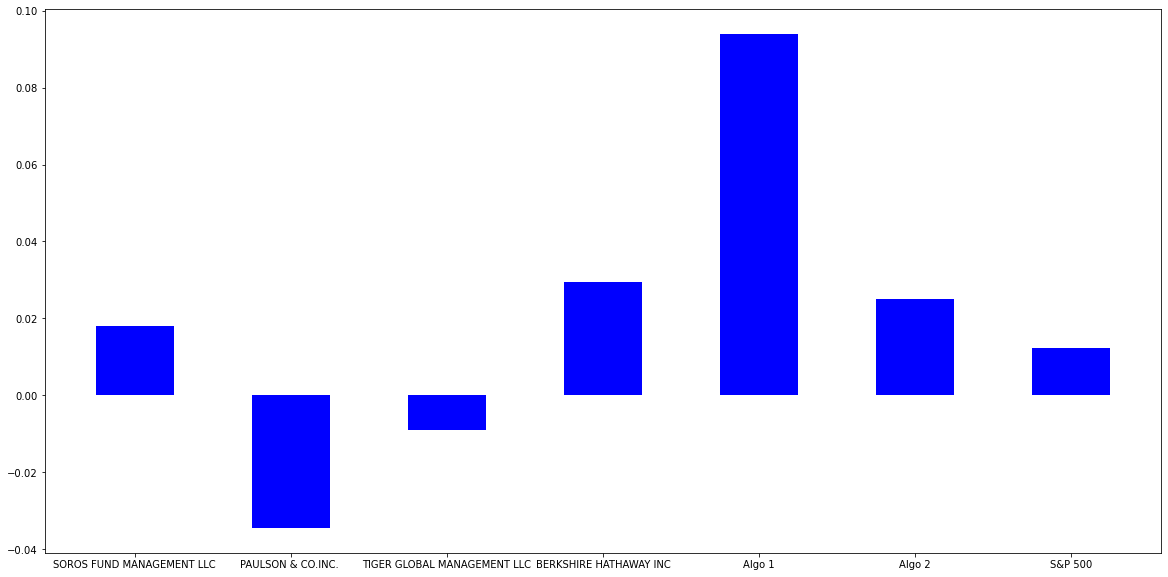

In [168]:
# Visualize the sharpe ratios as a bar plot
x = list(portfolio_sharpe.keys())
y = list(portfolio_sharpe.values)
fig = plt.figure(figsize=(20,10))
plt.bar(x, y, color='blue', width=0.5,)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!